In [3]:
import numpy as np
import pandas as pd
import datetime as datetime
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
# import pymc

In [4]:
pwd #current working folder location

'F:\\Dropbox\\Flight\\Code'

In [5]:
path= 'F:\\Dropbox\\Flight\\DATA\\cleaned_data'
path

'F:\\Dropbox\\Flight\\DATA\\cleaned_data'

In [6]:
os.chdir(path)

In [7]:
df= pd.read_csv('clean_data.csv', parse_dates=['scheduled_arrival_time','scheduled_departure_time',
                                               'actual_arrival_time','actual_departure_time'])

C:\Users\Jukwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# pd.set_option('display.max_rows', 8) # change presets for date preview
# pd.reset_option('display.max_rows')
# df

In [9]:
# df.dtypes

In [10]:
# del df["Unnamed: 0"]
# del df["Unnamed: 0.1"]


In [11]:
## overall there is 2 flight which has string flight no.
df['flt_no'].replace(['620A','052A'],[620,52], inplace= True)
df[['flt_no']] = df[['flt_no']].apply(pd.to_numeric)

In [12]:
## drop if flight is not actually operate. 
## df[] = df[df.actual_departure_time.notnull()]

In [13]:
# ## change the d type from string to datetime.
# # this part replaced by read_csv(, parse_dates= ['','']) option.

# df['scheduled_arrival_time']=pd.to_datetime(df['scheduled_arrival_time'])
# df['actual_arrival_time']=pd.to_datetime(df['actual_arrival_time'])
# df['scheduled_departure_time']=pd.to_datetime(df['scheduled_departure_time'])
# df['actual_departure_time']=pd.to_datetime(df['actual_departure_time'])

In [14]:
##  adding date and time in one column
coln= ['scheduled_departure','scheduled_arrival','actual_departure','actual_arrival']

for hey in coln:
    new_hey= hey+"_n"
    hey_date=hey+"_date"
    hey_time= hey+"_time"
    print(new_hey)
    hour=df[hey_time].dt.hour
    min=df[hey_time].dt.minute
    sec=df[hey_time].dt.second
    new_time = pd.DataFrame({'time': pd.to_datetime(df[hey_date])+pd.to_timedelta(hour,unit='h')+pd.to_timedelta(min,unit='m')+pd.to_timedelta(sec,unit='s')})
    df[new_hey]=new_time
#new variables

scheduled_departure_n
scheduled_arrival_n
actual_departure_n
actual_arrival_n


In [100]:
### this part replaced by for_loop code above
sd_hour=df['scheduled_departure_n'].dt.hour
# sd_min=df['scheduled_departure_time'].dt.minute
# sd_sec=df['scheduled_departure_time'].dt.second
# sd_time = pd.DataFrame({'time': pd.to_datetime(df["scheduled_departure_date"])+pd.to_timedelta(sd_hour,unit='h')+pd.to_timedelta(sd_min,unit='m')+pd.to_timedelta(sd_sec,unit='s')})


# sa_hour=df['scheduled_arrival_time'].dt.hour
# sa_min= df['scheduled_arrival_time'].dt.minute
# sa_sec= df['scheduled_arrival_time'].dt.second
# sa_time = pd.DataFrame({'time': pd.to_datetime(df["scheduled_arrival_date"])+pd.to_timedelta(sa_hour,unit='h')+pd.to_timedelta(sa_min,unit='m')+pd.to_timedelta(sa_sec,unit='s')})
# df['sa_time']=sa_time

# aa_hour=df['actual_arrival_time'].dt.hour
# aa_min= df['actual_arrival_time'].dt.minute
# aa_sec= df['actual_arrival_time'].dt.second
# aa_time = pd.DataFrame({'time': pd.to_datetime(df["actual_arrival_date"])+pd.to_timedelta(aa_hour,unit='h')+pd.to_timedelta(aa_min,unit='m')+pd.to_timedelta(aa_sec,unit='s')})
# df['aa_time']=aa_time

# ad_hour=df['actual_departure_time'].dt.hour
# ad_min= df['actual_departure_time'].dt.minute
# ad_sec= df['actual_departure_time'].dt.second
# ad_time = pd.DataFrame({'time': pd.to_datetime(df["actual_departure_date"])+pd.to_timedelta(ad_hour,unit='h')+pd.to_timedelta(ad_min,unit='m')+pd.to_timedelta(ad_sec,unit='s')})
# df['ad_time']=ad_time
sd_hour

0          9
1         11
2         10
3         10
4         12
5         11
6         12
7          8
8         10
9         12
10        12
11        11
12        12
13        11
14        12
15        11
16        11
17         7
18         8
19         8
20         8
21         6
22         7
23         8
24         9
25         8
26         6
27         9
28         8
29         8
          ..
540996    12
540997    11
540998    13
540999    13
541000    13
541001    13
541002    14
541003    13
541004    13
541005    13
541006    13
541007    19
541008    19
541009    19
541010    18
541011    14
541012    15
541013    15
541014    14
541015    14
541016    14
541017    14
541018    17
541019    17
541020    17
541021    19
541022    19
541023    11
541024    11
541025    11
Name: scheduled_departure_n, dtype: int64

In [16]:
# ## unique values
# for col_name in df.columns:
#     if df[col_name].dtypes == 'object':
#         unique_cat = len(df[col_name].unique())
#         print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

In [17]:
### delay in departure.
# scheduled_departure_n
# scheduled_arrival_n
# actual_departure_n
# actual_arrival_n
df['delay_dep'] = df['actual_departure_n']-df['scheduled_departure_n']
df['delay_dep'].describe()

count                    469601
mean     0 days 00:09:31.939327
std      0 days 00:44:54.098404
min           -1 days +00:00:00
25%           -1 days +23:55:00
50%           -1 days +23:59:00
75%             0 days 00:10:00
max             2 days 13:33:00
Name: delay_dep, dtype: object

In [18]:
## delay time in arrival
df['delay_arr'] = df['actual_arrival_n']-df['scheduled_arrival_n']
df['delay_arr'].describe()

count                    466948
mean     0 days 00:05:44.526242
std      0 days 00:50:03.740840
min           -3 days +20:34:00
25%           -1 days +23:48:00
50%           -1 days +23:57:00
75%             0 days 00:12:00
max             2 days 01:08:00
Name: delay_arr, dtype: object

In [19]:
#save all the colunms' name
vars=df.columns.values.tolist()

In [20]:
# list(df)

In [21]:
##deling with the time convert time which can be shown as distribution 
df['diff_arr']=df['delay_arr'].dt.total_seconds()
df['diff_dep']=df['delay_dep'].dt.total_seconds()
print(df['diff_arr'].head())##deling with the time convert time which can be shown as distribution 
df['diff_arr'].describe()

0    2400.0
1       NaN
2    -660.0
3   -1080.0
4    -720.0
Name: diff_arr, dtype: float64


count    466948.000000
mean        344.526243
std        3003.740840
min     -185160.000000
25%        -720.000000
50%        -180.000000
75%         720.000000
max      176880.000000
Name: diff_arr, dtype: float64

In [22]:
##delay indicator_arrival
mask = df['delay_arr'] > datetime.timedelta(minutes=15)
df['late_arr'] = mask.astype(int)

df['late_arr'].value_counts()

0    440751
1    100275
Name: late_arr, dtype: int64

In [23]:
##delay indicator_depature
mask = df['delay_dep'] > datetime.timedelta(minutes=5)
df['late_dep'] = mask.astype(int)

df['late_dep'].value_counts()

0    397285
1    143741
Name: late_dep, dtype: int64

In [24]:
## indcate early  = 1 if delay <1 min,
##delay indicator
mask = (df['delay_dep']< datetime.timedelta(minutes=-15))
df['early'] = mask.astype(int)

df['early'].value_counts()


0    538800
1      2226
Name: early, dtype: int64

In [25]:
list(df)
# ## df[] = df[df.actual_departure_time.notnull()]
mask =df.actual_departure_n.isnull()
mask.sample(5)
df['cancelled'] = mask.astype(int)
df['cancelled'].value_counts()

df.sort_values(by='cancelled')

,Unnamed: 0,flt_no,airline_code,airline_name,dep_airport_code,dep_airport_name,scheduled_departure_date,scheduled_departure_month,scheduled_departure_time,actual_departure_date,...,actual_departure_n,actual_arrival_n,delay_dep,delay_arr,diff_arr,diff_dep,late_arr,late_dep,early,cancelled
0,0,1527,AA,American Airlines,MIA,Miami International Apt,2014-11-15,11,2017-10-18 09:30:00,2014-11-15,...,2014-11-15 10:28:00,2014-11-15 13:23:00,00:58:00,00:40:00,2400.0,3480.0,1,1,0,0
347308,23594,4202,WN,Southwest Airlines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 12:15:00,2015-03-02,...,2015-03-02 13:11:00,2015-03-02 17:48:00,00:56:00,00:38:00,2280.0,3360.0,1,1,0,0
347307,23593,5,NH,All Nippon Airways,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 11:30:00,2015-03-02,...,2015-03-02 12:48:00,2015-03-03 17:06:00,01:18:00,00:41:00,2460.0,4680.0,1,1,0,0
347306,23592,488,B6,JetBlue Airways Corporation,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 12:20:00,2015-03-02,...,2015-03-02 15:34:00,2015-03-02 23:09:00,03:14:00,02:21:00,8460.0,11640.0,1,1,0,0
347305,23591,1314,AA,American Airlines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 11:25:00,2015-03-02,...,2015-03-02 11:39:00,2015-03-02 18:11:00,00:14:00,-1 days +23:49:00,-660.0,840.0,0,1,0,0
347304,23590,12,AA,American Airlines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 11:30:00,2015-03-02,...,2015-03-02 12:17:00,2015-03-02 19:52:00,00:47:00,-1 days +23:53:00,-420.0,2820.0,0,1,0,0
347302,23588,5709,DL,Delta Air Lines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 12:05:00,2015-03-02,...,2015-03-02 13:04:00,2015-03-02 14:46:00,00:59:00,01:21:00,4860.0,3540.0,1,1,0,0
347301,23587,6452,UA,United Airlines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 12:14:00,2015-03-02,...,2015-03-02 14:46:00,NaT,02:32:00,NaT,NaN,9120.0,0,1,0,0
347300,23586,1697,WS,Westjet,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 11:35:00,2015-03-02,...,2015-03-02 11:31:00,2015-03-02 14:18:00,-1 days +23:56:00,-1 days +23:55:00,-300.0,-240.0,0,0,0,0
347299,23585,4452,DL,Delta Air Lines,LAX,Los Angeles International Apt,2015-03-02,3,2017-10-18 11:35:00,2015-03-02,...,2015-03-02 12:02:00,2015-03-02 13:15:00,00:27:00,00:15:00,900.0,1620.0,0,1,0,0


In [26]:
# indicate the data: north and south arrival date | departuredata

# North departure
mask=(df['dep_airport_code']== 'BOS') |(df['dep_airport_code']== 'PVD')|(df['dep_airport_code']== 'MHT') |(df['dep_airport_code']== 'ORH') ;mask
df['north_dep']=mask.astype(int)
print(df['north_dep'].value_counts())
# North arrival
mask=(df['arr_airport_code']== 'BOS') |(df['arr_airport_code']== 'PVD')|(df['arr_airport_code']== 'MHT') |(df['arr_airport_code']== 'ORH') ;mask
df['north_arr']=mask.astype(int)
print(df['north_arr'].value_counts())

# indicate dep south
mask=(df['dep_airport_code']== 'LAX') |(df['dep_airport_code']== 'SNA')|(df['dep_airport_code']== 'BUR') |(df['dep_airport_code']== 'LGB') ;mask
df['south_dep']=mask.astype(int)
print(df['south_dep'].value_counts())

# south arrival
mask=(df['arr_airport_code']== 'LAX') |(df['arr_airport_code']== 'SNA')|(df['arr_airport_code']== 'BUR') |(df['arr_airport_code']== 'LGB') ;mask
df['south_arr']=mask.astype(int)
print(df['south_arr'].value_counts())


0    448169
1     92857
Name: north_dep, dtype: int64
0    449600
1     91426
Name: north_arr, dtype: int64
0    358532
1    182494
Name: south_dep, dtype: int64
0    358688
1    182338
Name: south_arr, dtype: int64


In [27]:
## or can use mapping 1. make dictionary 
city_to_dic={ 'BOS': 'North', 'PVD' :'North', 'MHT':'North', 'ORH': 'North', \
             'LAX' : 'South', 'LGB':'South', 'BUR':'South','SNA':'South' }
## 1. maping the function
df['loca_dep']= df['dep_airport_code'].map(city_to_dic)
df['loca_arr']= df['arr_airport_code'].map(city_to_dic)
df['loca_dep'].value_counts()


South    182494
North     92857
Name: loca_dep, dtype: int64

In [28]:
# location north = 1 or south =0
mask = (df['north_dep']==1)|(df['north_arr']==1)
df['north'] =mask.astype(int)
df['north'].value_counts()


0    356744
1    184282
Name: north, dtype: int64

In [29]:
# dep:  departure = 1 arrrival = 0
mask = (df['south_dep']==1)|(df['north_dep']==1)
df['dep']=mask.astype(int)
df['dep'].value_counts()

1    275351
0    265675
Name: dep, dtype: int64

In [30]:
df= df[['flt_no',
 'airline_code',
 'dep_airport_code',
 'scheduled_departure_date',
 'scheduled_departure_month',
 'actual_departure_date',
 'arr_airport_code',
 'scheduled_arrival_date',
 'scheduled_arrival_month',
 'actual_arrival_date',
 'scheduled_aircraft_code',
 'scheduled_aircraft_name',
 'temp',
 'dew_pt',
 'hum',
 'wind_spd',
 'wind_gust',
 'dir',
 'vis',
 'pressure',
 'wind_chill',
 'heat_index',
 'precip',
 'cond',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'tornado',
 'scheduled_departure_n',
 'scheduled_arrival_n',
 'actual_departure_n',
 'actual_arrival_n',
 'delay_dep',
 'delay_arr',
 'diff_arr',
 'diff_dep',
 'late_arr',
 'late_dep',
 'early',
 'north_dep',
 'north_arr',
 'south_dep',
 'south_arr',
 'loca_dep',
 'loca_arr',
 'north',
 'dep']]

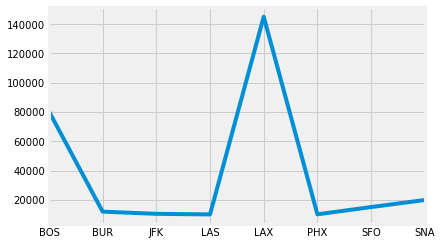

In [31]:
df['dep_airport_code'].value_counts().head(8).sort_index().plot()

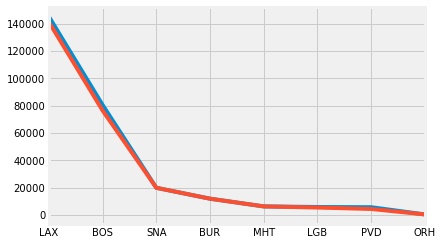

In [32]:
df['dep_airport_code'].where(df['dep']==1).value_counts().head(8).plot()
df['arr_airport_code'].where(df['dep']==0).value_counts().head(8).plot()

In [33]:
# df['loc_dum']= df.location.map({'South':0, 'North':1})
# df.loc[0:4, ['location','loc_dum']]

In [34]:
# #data slice
df_dep = df[df['dep']==1] # departure data
df_arr = df[df['dep']==0]


In [35]:
# % gen delay = 'delay_arr' if [dep] ==1
# % replace delay = delay_dep if df['dep'] ==0
#df[:,'delay']= df.loc[:,'delay_dep]
df2= df.copy()

# delay.head(10)
# delay.describe()
# pd.merge(df,delay)
# df2['dep'].where(df2['dep']==1, df2['diff_arr'],axis='index')
df['delay']=np.where(df['dep']==1, df['diff_dep'],df['diff_arr'])

In [36]:
df['delay'].head(4)

0    2400.0
1       NaN
2    -660.0
3   -1080.0
Name: delay, dtype: float64

In [37]:
df['airport']= np.where(df['dep']==1, df['dep_airport_code'],df['arr_airport_code'])

In [38]:
df['airport'].head(3)

0    BOS
1    BOS
2    BOS
Name: airport, dtype: object

In [39]:
df['scheduled_departure_month'].value_counts()

10    95779
3     94521
12    91395
1     89246
11    88390
2     81695
Name: scheduled_departure_month, dtype: int64

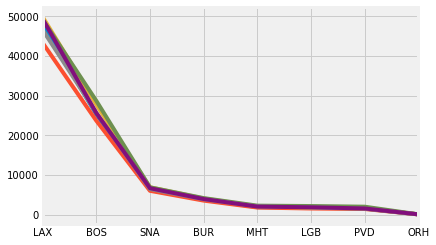

In [40]:
df['airport'].where(df['scheduled_departure_month']==1).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==2).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==3).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==10).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==11).value_counts().plot()
df['airport'].where(df['scheduled_departure_month']==12).value_counts().plot()

In [41]:
df['s_operation_time'] = np.where(df['dep']==1, df['scheduled_departure_n'], df['scheduled_arrival_n'])
df['s_operation_time'].head(3)

0   2014-11-15 12:43:00
1   2014-11-15 13:01:00
2   2014-11-15 12:54:00
Name: s_operation_time, dtype: datetime64[ns]

In [42]:
df['a_operation_time'] = np.where(df['dep']==1, df['actual_departure_n'], df['actual_arrival_n'])
df['a_operation_time'].head(3)

0   2014-11-15 13:23:00
1                   NaT
2   2014-11-15 12:43:00
Name: a_operation_time, dtype: datetime64[ns]

In [43]:
# list(df)

In [44]:
df.sort_values(by="delay_arr", ascending =False)[:10]

,flt_no,airline_code,dep_airport_code,scheduled_departure_date,scheduled_departure_month,actual_departure_date,arr_airport_code,scheduled_arrival_date,scheduled_arrival_month,actual_arrival_date,...,south_dep,south_arr,loca_dep,loca_arr,north,dep,delay,airport,s_operation_time,a_operation_time
319787,1212,DL,HNL,2015-02-13,2,2015-02-16,LAX,2015-02-14,2,2015-02-16,...,0,1,NaN,South,0,0,176880.0,LAX,2015-02-14 05:39:00,2015-02-16 06:47:00
236467,224,AA,LAS,2015-01-18,1,2015-01-19,LAX,2015-01-18,1,2015-01-19,...,0,1,NaN,South,0,0,95580.0,LAX,2015-01-18 12:46:00,2015-01-19 15:19:00
187455,270,AA,HNL,2015-03-04,3,2015-03-05,LAX,2015-03-04,3,2015-03-05,...,0,1,NaN,South,0,0,94560.0,LAX,2015-03-04 15:55:00,2015-03-05 18:11:00
516732,660,US,PHX,2015-03-07,3,2015-03-07,SNA,2015-03-07,3,2015-03-08,...,0,1,NaN,South,0,0,88860.0,SNA,2015-03-07 18:16:00,2015-03-08 18:57:00
388530,558,G4,LAX,2015-01-08,1,2015-01-08,MFR,2015-01-08,1,2015-01-09,...,1,0,South,NaN,0,1,1980.0,LAX,2015-01-08 17:27:00,2015-01-08 18:00:00
391845,558,G4,LAX,2015-01-04,1,2015-01-04,MFR,2015-01-04,1,2015-01-05,...,1,0,South,NaN,0,1,1920.0,LAX,2015-01-04 17:50:00,2015-01-04 18:22:00
408358,558,G4,LAX,2014-12-14,12,2014-12-14,MFR,2014-12-14,12,2014-12-15,...,1,0,South,NaN,0,1,2400.0,LAX,2014-12-14 17:49:00,2014-12-14 18:29:00
208674,472,CM,PTY,2014-10-26,10,2014-10-26,LAX,2014-10-26,10,2014-10-27,...,0,1,NaN,South,0,0,87060.0,LAX,2014-10-26 16:48:00,2014-10-27 16:59:00
205793,472,CM,PTY,2014-10-30,10,2014-10-30,LAX,2014-10-30,10,2014-10-31,...,0,1,NaN,South,0,0,86880.0,LAX,2014-10-30 16:48:00,2014-10-31 16:56:00
198046,472,CM,PTY,2014-11-11,11,2014-11-11,LAX,2014-11-11,11,2014-11-12,...,0,1,NaN,South,0,0,86880.0,LAX,2014-11-11 15:48:00,2014-11-12 15:56:00


In [45]:
results=[]

In [46]:
## save this and expor to excel.

desc_d =df_dep.groupby('dep_airport_code').describe()     
desc_a= df_arr.groupby('arr_airport_code').describe()  

results.append(desc_d)
results.append(desc_a)
append_results= pd.concat(results, axis= 0)
append_results.to_excel('desc.xlsx')

In [70]:
group_by_airport= df.groupby(['airport','late_arr'])

group_by_airport.size().unstack()

#late_arr is arrival >15

late_arr,0,1
airport,,
BOS,126832,30050
BUR,20736,3022
LAX,230193,56094
LGB,9432,1609
MHT,10188,2278
ORH,612,118
PVD,8443,1717
SNA,34315,5387


In [83]:
dep_lateby = df.groupby(['airport','late_dep'])
dep_lateby.size().unstack()
delay= dep_lateby.size().unstack()

In [85]:
delay

late_dep,0,1
airport,,
BOS,117970,38912
BUR,19193,4565
LAX,203014,83273
LGB,8850,2191
MHT,9423,3043
ORH,596,134
PVD,7817,2343
SNA,30422,9280


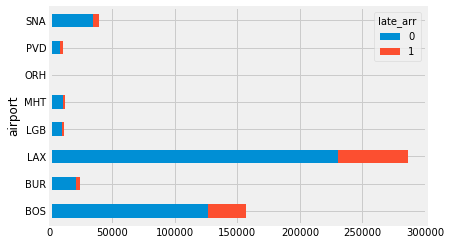

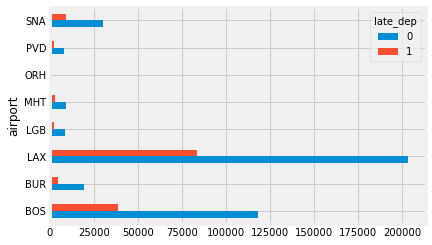

In [87]:
count_delay=group_by_airport.size().unstack()
count_delay.plot(kind='barh',stacked=True)
delay.plot(kind='barh')

In [49]:
flights_by_airport = df.pivot_table(index='scheduled_departure_date', columns='airport', values='flt_no', aggfunc='count')
flights_by_airport.head(10)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_date,,,,,,,,
2014-10-01,964,146,1583,64,80,4,108,236
2014-10-02,999,146,1663,67,80,4,112,238
2014-10-03,1016,146,1665,66,80,4,114,238
2014-10-04,693,94,1341,63,57,4,90,168
2014-10-05,908,134,1628,67,73,4,105,218
2014-10-06,1003,144,1655,68,80,4,113,238
2014-10-07,956,142,1578,67,80,4,108,230
2014-10-08,971,146,1600,66,80,4,108,236
2014-10-09,1012,146,1662,69,80,4,107,238


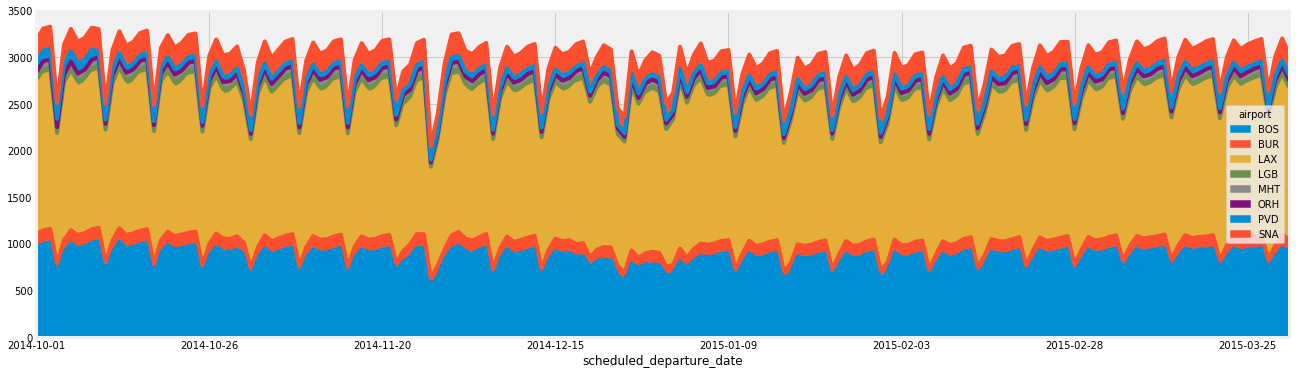

In [50]:
# daily flight operations
flights_by_airport.plot(kind='area',figsize=[20,6],stacked=True )

In [51]:
# mean delay by airport (seconds).
mean_delay_by_airport = df.pivot_table(index='scheduled_departure_date', columns='airport', values='delay', aggfunc='mean')

mean_delay_by_airport.head(10)


airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_date,,,,,,,,
2014-10-01,1597.597911,-10.909091,144.369085,-210.000000,1062.500000,390.0,940.588235,241.818182
2014-10-02,699.519595,588.837209,823.879245,268.656716,1094.117647,-270.0,617.647059,580.476190
2014-10-03,581.544209,-36.521739,544.915129,-404.545455,909.600000,-440.0,651.176471,320.454545
2014-10-04,142.243346,-116.000000,435.081081,27.619048,-312.727273,-740.0,28.846154,-355.800000
2014-10-05,57.566434,68.181818,437.142857,134.328358,-192.000000,-600.0,107.796610,69.836066
2014-10-06,201.439206,-56.000000,340.297177,357.352941,602.307692,-885.0,76.521739,348.358209
2014-10-07,558.972332,42.857143,330.514821,14.328358,-30.000000,-780.0,-28.235294,311.904762
2014-10-08,15.076531,821.739130,335.212355,146.363636,126.923077,1230.0,296.470588,286.363636
2014-10-09,102.963885,377.727273,385.897059,1.764706,-30.000000,960.0,389.552239,349.253731


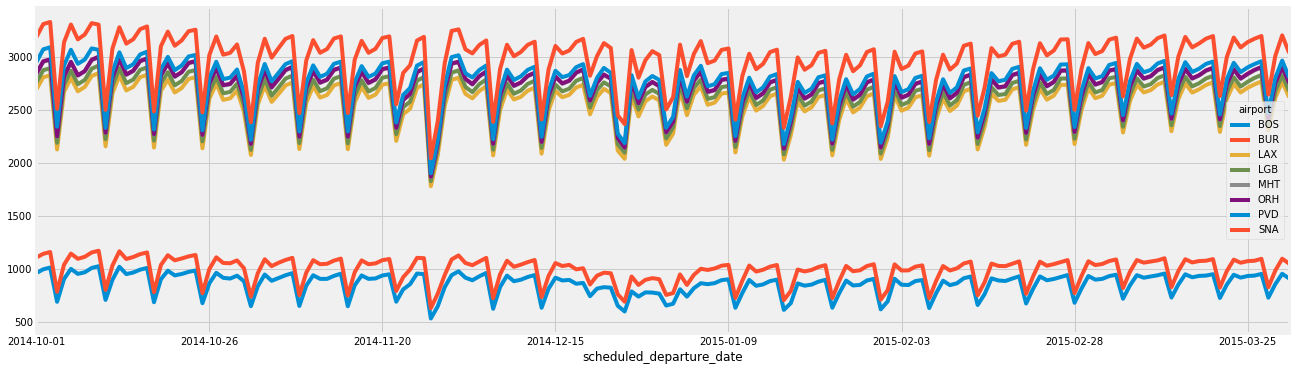

In [52]:
flights_by_airport.plot(figsize=[20,6],stacked=True )

In [64]:
# mean arrival delay by airport (seconds).
mean_arr_delay_by_airport = df.pivot_table(index='scheduled_departure_month', columns='airport', values='diff_arr', aggfunc='mean')

mean_arr_delay_by_airport.head(10)

airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_month,,,,,,,,
1,423.754400,229.977388,195.198308,77.932203,613.112128,400.363636,431.884457,28.831530
2,1289.530674,347.457627,329.203423,363.623649,776.252390,673.548387,678.627145,135.415541
3,493.701323,124.937534,433.358462,120.066593,505.940299,45.737705,468.713592,23.945836
10,252.145315,-383.048780,104.223227,-66.643802,259.944483,-287.903226,283.764205,75.179985
11,146.831311,353.146461,145.877000,240.616549,249.761388,-350.689655,260.181818,124.755817
12,132.418420,756.528409,697.429256,466.602254,314.434524,-42.857143,78.125396,566.025092


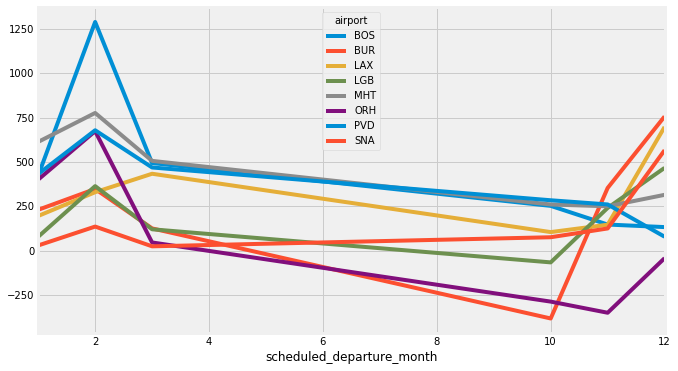

In [67]:
mean_delay_by_airport.plot(figsize=[10,6])

In [68]:
mean_delay_by_airport = df.pivot_table(index='scheduled_departure_month', columns='airport', values='diff_dep', aggfunc='mean')
mean_delay_by_airport

airport,BOS,BUR,LAX,LGB,MHT,ORH,PVD,SNA
scheduled_departure_month,,,,,,,,
1,561.645440,339.994358,503.899140,250.450958,782.604226,406.486486,924.107143,273.569667
2,1164.773094,509.539618,614.816487,505.883100,890.127065,634.838710,913.033359,343.740304
3,586.930967,314.231499,713.118865,300.764120,743.379722,117.024793,638.994549,316.065669
10,437.483927,106.600610,380.472515,43.713866,507.586685,38.225806,421.446809,261.108287
11,366.535935,398.727273,479.530716,405.234754,491.090253,-144.310345,842.613430,358.854962
12,447.371914,821.854155,858.692456,510.935484,642.124506,112.372881,806.001263,733.882639


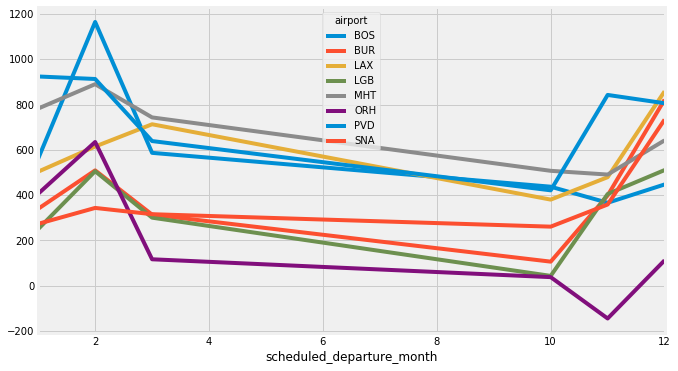

In [69]:
mean_delay_by_airport.plot(figsize=[10,6])

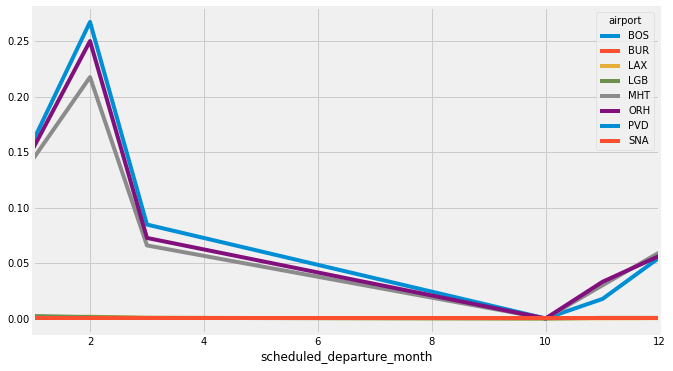

In [95]:
weather_by_airport = df.pivot_table(index='scheduled_departure_month', columns='airport', values='snow', aggfunc='mean')
weather_by_airport.head()
weather_by_airport.plot(figsize=[10,6])

In [111]:
hourly_operlation= df.pivot_table(index ='sd_hour', columns= 'airport', values= 'flt_no', aggfunc='mean')
# hourly_operlation.plot(figsize=[10,6])

In [53]:
df.pivot_table(columns='scheduled_departure_date')

scheduled_departure_date,2014-10-01,2014-10-02,2014-10-03,2014-10-04,2014-10-05,2014-10-06,2014-10-07,2014-10-08,2014-10-09,2014-10-10,...,2015-03-22,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-28,2015-03-29,2015-03-30,2015-03-31
delay,643.834586,750.763636,518.311534,265.727700,267.560771,286.022187,368.100000,230.020433,276.232227,575.942948,...,704.012876,726.842105,128.598002,208.187373,515.729202,495.817819,288.257699,752.996801,632.183450,199.255429
dep,0.507064,0.509822,0.508561,0.508765,0.509085,0.508018,0.508057,0.508564,0.509644,0.509080,...,0.509000,0.509428,0.509226,0.509079,0.508042,0.509853,0.507372,0.508807,0.509210,0.516628
dew_pt,58.848446,47.111635,40.935716,48.657809,49.847689,51.501120,57.345403,57.493367,51.479747,52.476846,...,36.886633,35.104965,37.667271,42.206212,45.009713,46.077667,48.486843,41.611831,46.308711,43.707837
diff_arr,555.955056,771.691562,397.049051,281.591264,141.841004,366.700990,241.574344,132.825733,298.177515,562.743083,...,554.377682,548.825911,-73.563060,84.879539,530.966655,382.794411,114.870340,512.921109,547.295681,31.191710
diff_dep,632.874326,592.882992,528.664572,375.023328,408.394343,425.836944,451.666667,360.609508,433.160377,676.033058,...,760.277186,812.134228,277.402062,397.195946,679.644056,704.657625,496.398870,807.498233,734.900662,374.180694
early,0.003454,0.002115,0.003304,0.006375,0.002869,0.002421,0.003476,0.006851,0.003315,0.003027,...,0.004667,0.004085,0.006475,0.004141,0.001261,0.004379,0.002268,0.003323,0.003434,0.004939
flt_no,1986.107064,2067.568147,2057.661460,1966.554980,2044.482627,2074.798487,2083.295735,2079.668016,2060.136528,2041.437954,...,2141.851333,2083.862036,2110.148592,2094.010513,2082.289183,2080.082577,2120.679017,2139.271519,2070.832345,2104.471189
fog,0.027943,0.048051,0.002403,0.027490,0.323239,0.105295,0.177567,0.060729,0.001808,0.114407,...,0.000000,0.000000,0.000000,0.000000,0.003784,0.001251,0.016635,0.031240,0.000000,0.000000
hail,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
heat_index,81.145000,83.913245,80.400000,82.765714,82.087692,81.138462,82.972789,82.013095,NaN,NaN,...,NaN,NaN,NaN,80.916667,81.195238,NaN,NaN,NaN,NaN,NaN


In [54]:
#how much of data is missing
df.isnull().sum().sort_values(ascending=False).head()

heat_index    539725
precip        485879
wind_gust     485458
wind_chill    422018
loca_arr      267262
dtype: int64

In [55]:
# grouped_arr.get_group('BOS').describe()

In [56]:
#get_dummies in pandas
# pd.get_dummies(df['month'])
# make date. 
#df['new']= df['early'].map(lambda x : "new"+x)
#df['new']= df['early'].map(lambda x : x*x)

In [57]:
def plot_histogram(x):
    plt.hist(x, alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

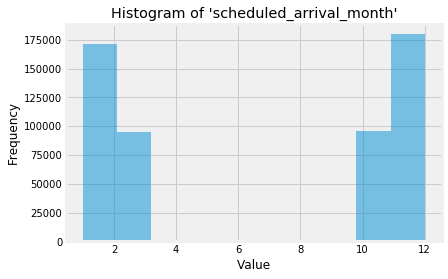

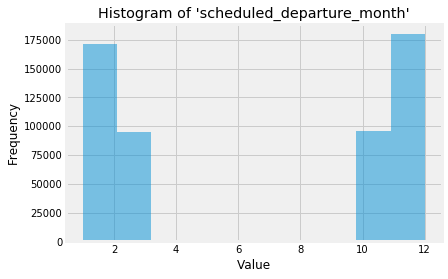

In [58]:
plot_histogram(df['scheduled_arrival_month'])
plot_histogram(df['scheduled_departure_month'])

In [59]:

# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

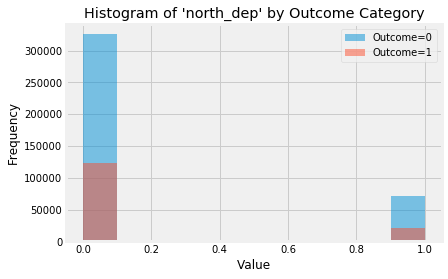

In [60]:
plot_histogram_dv(df['north_dep'],df['late_dep'])

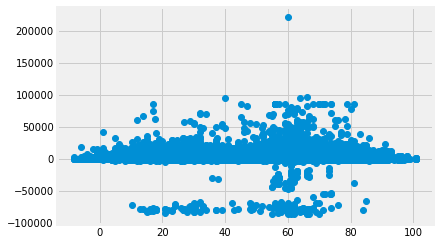

In [107]:
from matplotlib.pyplot import *
plot(df['temp'],df['diff_dep'],'o') 
